In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv('house_prices.csv.csv')
# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
# Display summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
# Display descriptive statistics
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Drop rows where 'SalePrice' is missing
data = data.dropna(subset=['SalePrice'])

In [7]:
# Fill missing values for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [8]:
# Fill missing values for numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)

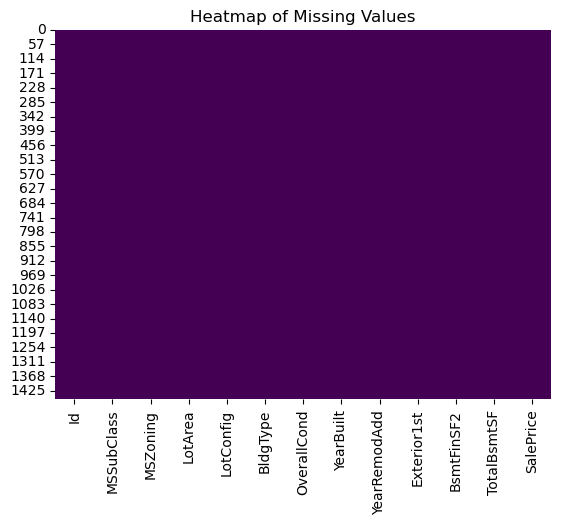

In [9]:
# Heatmap of missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

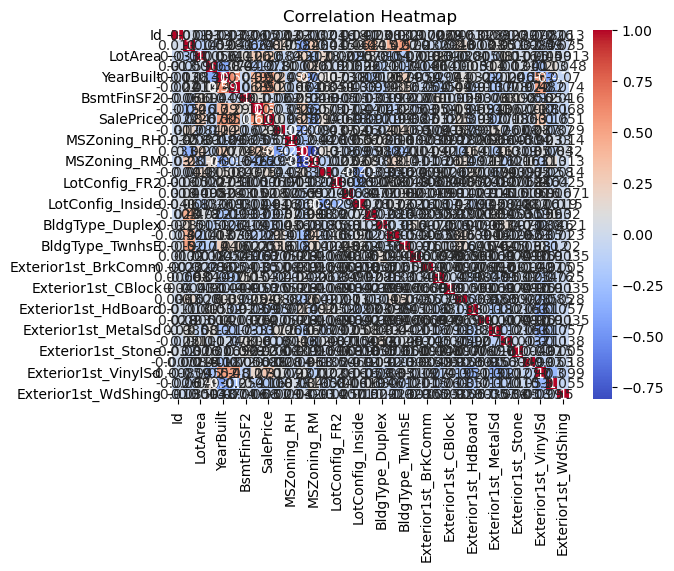

In [10]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Correlation heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
#Normalization/Scaling Numerical Features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

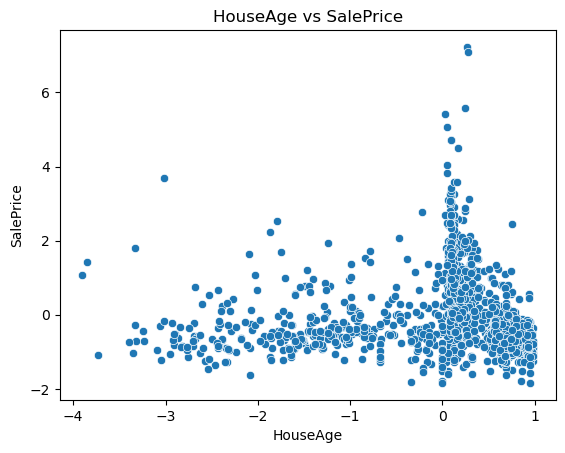

In [12]:
# Create a new feature for house age
data_encoded['HouseAge'] = data_encoded['YearBuilt'] - data_encoded['YearRemodAdd']

# Scatter plot for HouseAge vs SalePrice
sns.scatterplot(x=data_encoded['HouseAge'], y=data_encoded['SalePrice'])
plt.title('HouseAge vs SalePrice')
plt.xlabel('HouseAge')
plt.ylabel('SalePrice')
plt.show()

In [13]:
#Model Selection
from sklearn.model_selection import train_test_split

X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Training Models:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Train Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Train Gradient Boosting model
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [15]:
#Model Evaluation
#Evaluating Model Performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
y_pred_lr = model_lr.predict(X_test)
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - R-squared:", r2_score(y_test, y_pred_lr))

# Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R-squared:", r2_score(y_test, y_pred_rf))

# Evaluate Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting - R-squared:", r2_score(y_test, y_pred_gb))

Linear Regression - MAE: 0.42975963469147954
Linear Regression - MSE: 0.4625959497149677
Linear Regression - R-squared: 0.6196387511449678
Random Forest - MAE: 0.2963974141315698
Random Forest - MSE: 0.231367290676455
Random Forest - R-squared: 0.8097623818796391
Gradient Boosting - MAE: 0.2980506339026718
Gradient Boosting - MSE: 0.20919713030662315
Gradient Boosting - R-squared: 0.827991399861274


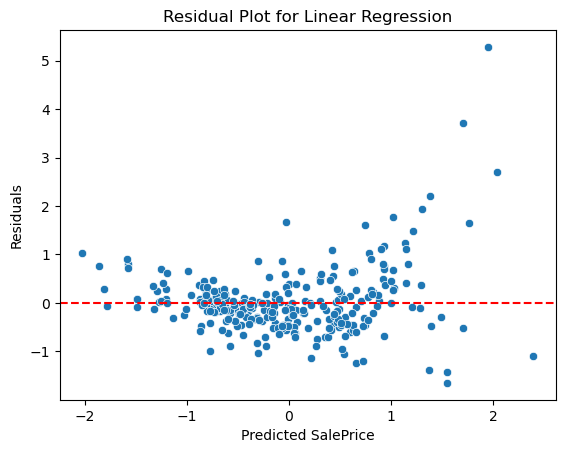

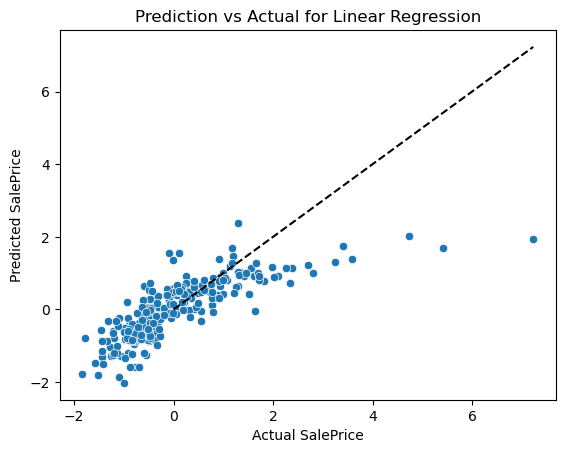

In [16]:
#Residual Plots and Prediction vs Actual Plots:
# Residual plot for Linear Regression
residuals_lr = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

# Prediction vs Actual plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([0, max(y_test)], [0, max(y_test)], '--k')
plt.title('Prediction vs Actual for Linear Regression')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

In [17]:
#Model Optimization
#Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [18]:
#Model Saving:
import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

['best_model.pkl']